In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
df = pd.read_csv('gdrive/MyDrive/researchProjectIME/combined_banglore_clean.csv')

In [3]:
df.head()

,Unnamed: 0,date,tweet,language,hashtags,user_id,retweet,nlikes,nreplies,nretweets,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,jugaad,dates
0,0,2021-05-19,Study Unders who received first AstraZeneca do...,en,[],75925163,False,2.0,2.0,1.0,"['study', 'unders', 'who', 'received', 'first'...","['study', 'unders', 'received', 'first', 'astr...","['studi', 'under', 'receiv', 'first', 'astraze...","['study', 'unders', 'received', 'first', 'astr...",519,28
1,1,2021-05-19,jussabt surajbrf Didnt you read the policy pat...,en,[],164602947,False,0.0,0.0,0.0,"['jussabt', 'surajbrf', 'didnt', 'you', 'read'...","['jussabt', 'surajbrf', 'didnt', 'read', 'poli...","['jussabt', 'surajbrf', 'didnt', 'read', 'poli...","['jussabt', 'surajbrf', 'didnt', 'read', 'poli...",519,28
2,2,2021-05-19,BloreUpdater Any walk in centers available for...,en,[],886533936,False,0.0,0.0,0.0,"['bloreupdater', 'any', 'walk', 'in', 'centers...","['bloreupdater', 'walk', 'centers', 'available...","['bloreupdat', 'walk', 'center', 'avail', 'cov...","['bloreupdater', 'walk', 'center', 'available'...",519,28
3,3,2021-05-19,Stania PrannoyRoyNDTV More than cr people hav...,en,[],164602947,False,0.0,0.0,0.0,"['stania', 'prannoyroyndtv', 'more', 'than', '...","['stania', 'prannoyroyndtv', 'cr', 'people', '...","['stania', 'prannoyroyndtv', 'cr', 'peopl', 'r...","['stania', 'prannoyroyndtv', 'cr', 'people', '...",519,28
4,4,2021-05-19,Gravitas UAE and Bahrain to offer a third dose...,en,[],1467493320,False,0.0,0.0,0.0,"['gravitas', 'uae', 'and', 'bahrain', 'to', 'o...","['gravitas', 'uae', 'bahrain', 'offer', 'third...","['gravita', 'uae', 'bahrain', 'offer', 'third'...","['gravitas', 'uae', 'bahrain', 'offer', 'third...",519,28


In [4]:
df_dictionary = pd.read_csv('gdrive/MyDrive/researchProjectIME/data_dictionary_prob.csv')
df_dictionary.head()

,making
0,supply
1,increased
2,exceeds
3,resisting
4,refused


In [5]:
keywords = []
for word in df_dictionary.making:
  keywords.append(word)

In [6]:
keywords

['supply',
 'increased',
 'exceeds',
 'resisting',
 'refused',
 'created',
 'demand',
 'grant',
 'repeating',
 'press',
 'paid',
 'diminish',
 'concede',
 'caused',
 'accepts',
 'stating',
 'occasioned',
 'lays',
 'fulfil',
 'brought',
 'suit',
 'rejected',
 'lessens',
 'considering',
 'hearing',
 'followed',
 'decrease',
 'come',
 'anticipating',
 'yielded',
 'withdrew',
 'urged',
 'stimulating',
 'renewed',
 'reiterated',
 'reduce',
 'raise',
 'prevent',
 'present',
 'obtain',
 'modify',
 'moderate',
 'justify',
 'evade',
 'escape',
 'constitute',
 'carry',
 'affect',
 'underlying',
 'touching',
 'suppose',
 'silence',
 'show',
 'see',
 'seconding',
 'save',
 'revive',
 'regard',
 'read',
 'produce',
 'prefer',
 'point',
 'please',
 'obey',
 'neglect',
 'need',
 'limit',
 'like',
 'issue',
 'involve',
 'imply',
 'honor',
 'heeded',
 'hath',
 'gave',
 'gain',
 'fill',
 'feel',
 'favor',
 'examine',
 'equal',
 'endorse',
 'encourage',
 'disregard',
 'discover',
 'discharge',
 'deny',
 

In [7]:
df.head(12206)

,Unnamed: 0,date,tweet,language,hashtags,user_id,retweet,nlikes,nreplies,nretweets,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,jugaad,dates
0,0,2021-05-19,Study Unders who received first AstraZeneca do...,en,[],75925163,False,2.0,2.0,1.0,"['study', 'unders', 'who', 'received', 'first'...","['study', 'unders', 'received', 'first', 'astr...","['studi', 'under', 'receiv', 'first', 'astraze...","['study', 'unders', 'received', 'first', 'astr...",519,28
1,1,2021-05-19,jussabt surajbrf Didnt you read the policy pat...,en,[],164602947,False,0.0,0.0,0.0,"['jussabt', 'surajbrf', 'didnt', 'you', 'read'...","['jussabt', 'surajbrf', 'didnt', 'read', 'poli...","['jussabt', 'surajbrf', 'didnt', 'read', 'poli...","['jussabt', 'surajbrf', 'didnt', 'read', 'poli...",519,28
2,2,2021-05-19,BloreUpdater Any walk in centers available for...,en,[],886533936,False,0.0,0.0,0.0,"['bloreupdater', 'any', 'walk', 'in', 'centers...","['bloreupdater', 'walk', 'centers', 'available...","['bloreupdat', 'walk', 'center', 'avail', 'cov...","['bloreupdater', 'walk', 'center', 'available'...",519,28
3,3,2021-05-19,Stania PrannoyRoyNDTV More than cr people hav...,en,[],164602947,False,0.0,0.0,0.0,"['stania', 'prannoyroyndtv', 'more', 'than', '...","['stania', 'prannoyroyndtv', 'cr', 'people', '...","['stania', 'prannoyroyndtv', 'cr', 'peopl', 'r...","['stania', 'prannoyroyndtv', 'cr', 'people', '...",519,28
4,4,2021-05-19,Gravitas UAE and Bahrain to offer a third dose...,en,[],1467493320,False,0.0,0.0,0.0,"['gravitas', 'uae', 'and', 'bahrain', 'to', 'o...","['gravitas', 'uae', 'bahrain', 'offer', 'third...","['gravita', 'uae', 'bahrain', 'offer', 'third'...","['gravitas', 'uae', 'bahrain', 'offer', 'third...",519,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12201,12201,2021-04-22,We are reading about stress issues due to COVI...,en,"['covid19', 'sudershanballal']",16865395,False,1.0,0.0,0.0,"['we', 'are', 'reading', 'about', 'stress', 'i...","['reading', 'stress', 'issues', 'due', 'covid'...","['read', 'stress', 'issu', 'due', 'covid', 'si...","['reading', 'stress', 'issue', 'due', 'covid',...",422,1
12202,12202,2021-04-22,RJainaviation khabrilal SeanM Encashing on the...,en,[],15628784,False,0.0,0.0,0.0,"['rjainaviation', 'khabrilal', 'seanm', 'encas...","['rjainaviation', 'khabrilal', 'seanm', 'encas...","['rjainavi', 'khabril', 'seanm', 'encash', 'ai...","['rjainaviation', 'khabrilal', 'seanm', 'encas...",422,1
12203,12203,2021-04-21,guardian httpstcoPfSAKlzeb yes its tagged opi...,en,[],189233232,False,0.0,0.0,0.0,"['guardian', 'httpstcopfsaklzeb', 'yes', 'its'...","['guardian', 'httpstcopfsaklzeb', 'yes', 'tagg...","['guardian', 'httpstcopfsaklzeb', 'ye', 'tag',...","['guardian', 'httpstcopfsaklzeb', 'yes', 'tagg...",421,0
12204,12204,2021-04-21,drashwathcn drashwathcn a great admiration Kid...,en,['kidwai'],1241712600020221952,False,0.0,0.0,0.0,"['drashwathcn', 'drashwathcn', 'a', 'great', '...","['drashwathcn', 'drashwathcn', 'great', 'admir...","['drashwathcn', 'drashwathcn', 'great', 'admir...","['drashwathcn', 'drashwathcn', 'great', 'admir...",421,0


In [8]:
df['frequency']=0
for word in keywords:
  df['frequency'] += df['tweet'].map(lambda x: x.count(word))

In [9]:
df.head()
size=df.shape[0]

In [10]:
df.dates.describe()

count    12208.000000
mean        22.228621
std          7.373670
min          0.000000
25%         21.000000
50%         25.000000
75%         27.000000
max         28.000000
Name: dates, dtype: float64

In [11]:
sum=[]
for i in range(29):
  s=0
  for j in range(size):
    if(df['dates'][j]==i):
      s=s+df['frequency'][j]
  sum.append(s)

In [12]:
sum

[410,
 374,
 299,
 362,
 504,
 302,
 268,
 622,
 397,
 404,
 558,
 308,
 347,
 369,
 546,
 452,
 285,
 452,
 381,
 526,
 596,
 821,
 501,
 349,
 2850,
 5376,
 5477,
 5422,
 5321]

In [13]:
import datetime 

In [14]:
start_date = datetime.date(2021, 4, 21)
end_date = datetime.date(2021,5,19)
delta = datetime.timedelta(days=1)
date=[]
while start_date <= end_date:
    print(start_date)
    date.append(start_date)
    start_date += delta

2021-04-21
2021-04-22
2021-04-23
2021-04-24
2021-04-25
2021-04-26
2021-04-27
2021-04-28
2021-04-29
2021-04-30
2021-05-01
2021-05-02
2021-05-03
2021-05-04
2021-05-05
2021-05-06
2021-05-07
2021-05-08
2021-05-09
2021-05-10
2021-05-11
2021-05-12
2021-05-13
2021-05-14
2021-05-15
2021-05-16
2021-05-17
2021-05-18
2021-05-19


In [15]:
final=pd.DataFrame(columns=["date","freq"])
final['date'] = date
final['freq'] = sum

In [16]:
final
#final.drop(i,axis=0,inplace=True)

,date,freq
0,2021-04-21,410
1,2021-04-22,374
2,2021-04-23,299
3,2021-04-24,362
4,2021-04-25,504
5,2021-04-26,302
6,2021-04-27,268
7,2021-04-28,622
8,2021-04-29,397
9,2021-04-30,404


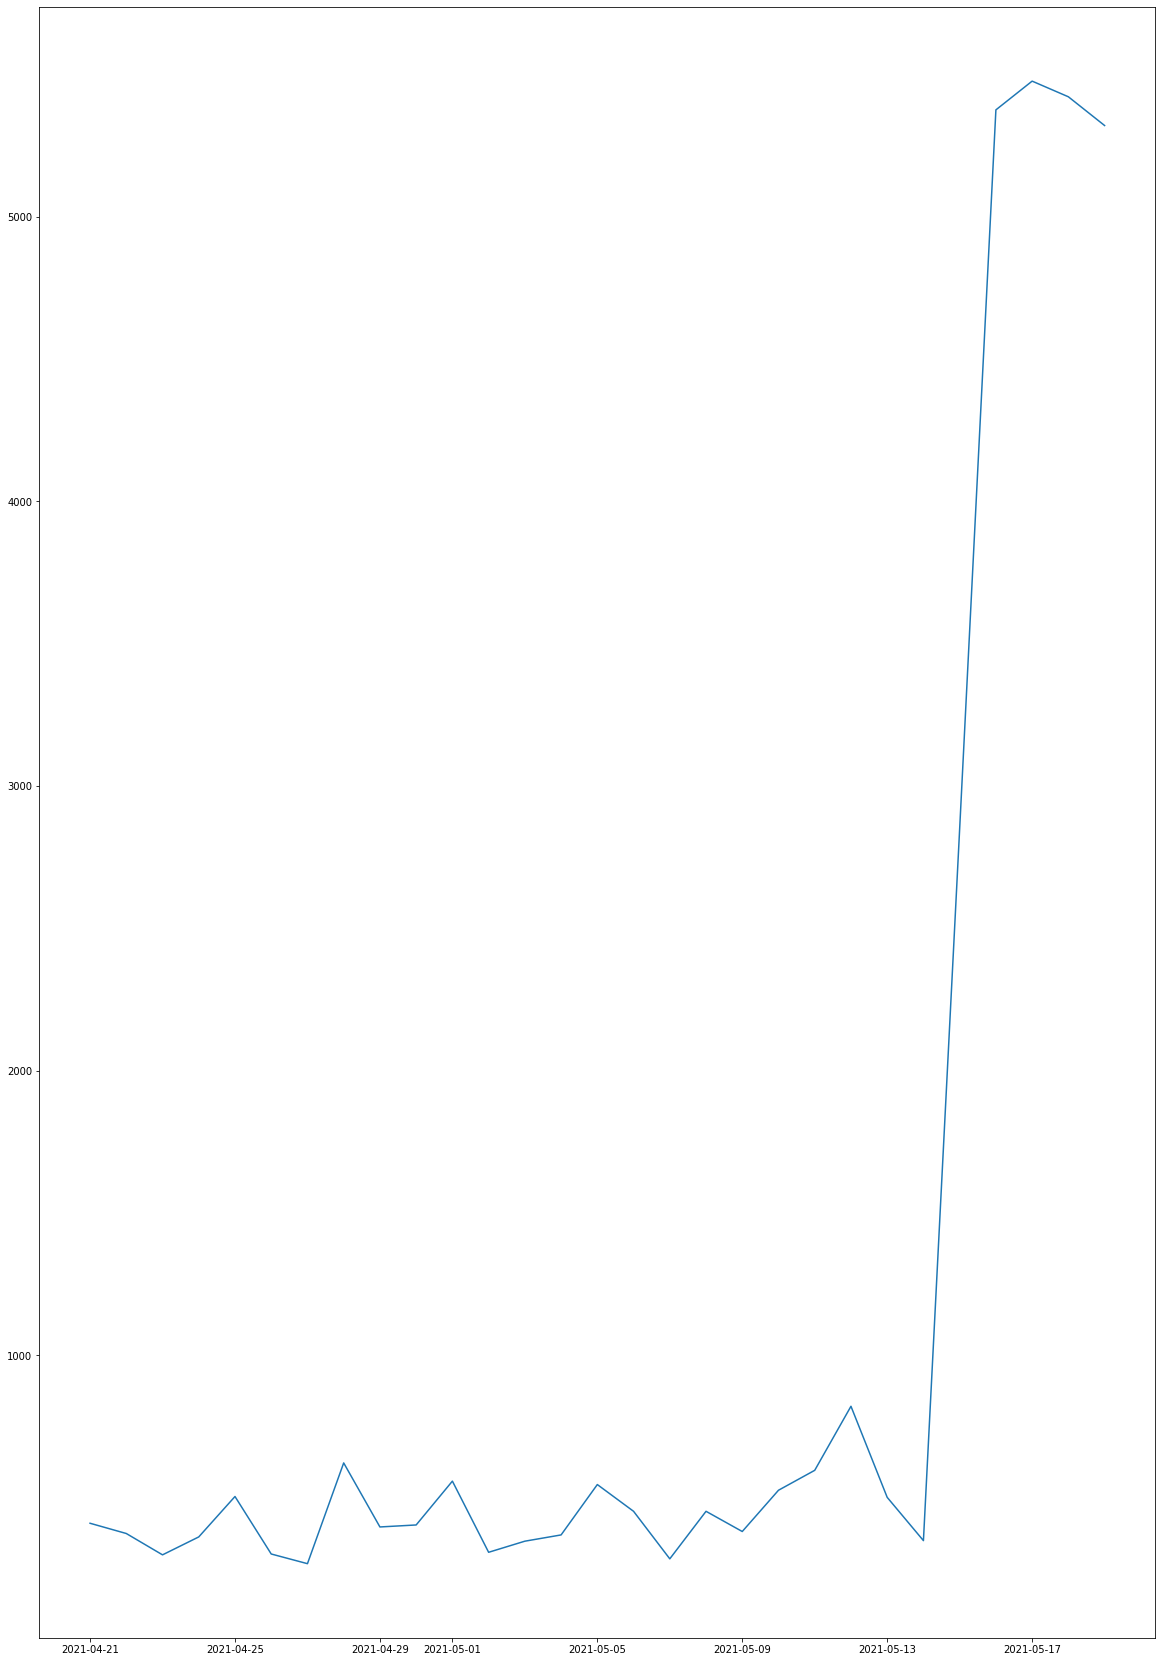

In [17]:
import numpy as np
import matplotlib.pyplot as plt
x=final.date
y=final.freq
plt.figure(figsize=(20,30))
plt.plot(x,y)

In [18]:
vaccinated_df= pd.read_csv('gdrive/MyDrive/researchProjectIME/bangalore_data.csv')

In [19]:
vaccinated_df

,|__vaccine_date,|__total,|__dose_1,|__dose_2
0,4/21/2021,4529,2845,1684
1,4/22/2021,3567,1980,1587
2,4/23/2021,8238,5317,2921
3,4/24/2021,4203,3002,1201
4,4/25/2021,1730,1276,454
5,4/26/2021,7528,4254,3274
6,4/27/2021,6011,3242,2769
7,4/28/2021,6285,3505,2780
8,4/29/2021,4410,2334,2076
9,4/30/2021,8241,4845,3396


In [20]:
vaccinated_df['|__vaccine_date'][0] 
kk=[]
final['vaccinated1']=0
final['freq11']=0

In [21]:
kk=[]

for  i in range(29):
  if(vaccinated_df['|__total'][i]!=64):
    kk.append(vaccinated_df['|__total'][i])
kk

[4529,
 3567,
 8238,
 4203,
 1730,
 7528,
 6011,
 6285,
 4410,
 8241,
 4727,
 1865,
 2008,
 4190,
 7410,
 3735,
 5484,
 4171,
 1376,
 4205,
 4207,
 3688,
 2186,
 1908,
 1679,
 1523,
 1010,
 1240]

In [22]:
kk.append(1000)
final['vaccinated']=kk
final

,date,freq,vaccinated1,freq11,vaccinated
0,2021-04-21,410,0,0,4529
1,2021-04-22,374,0,0,3567
2,2021-04-23,299,0,0,8238
3,2021-04-24,362,0,0,4203
4,2021-04-25,504,0,0,1730
5,2021-04-26,302,0,0,7528
6,2021-04-27,268,0,0,6011
7,2021-04-28,622,0,0,6285
8,2021-04-29,397,0,0,4410
9,2021-04-30,404,0,0,8241


In [26]:
final['vaccinated1']=0
final['freq1']=0
a=4
b=3
c=3/4
ma=[]
ca=[]
for i in range(29):
  c=(final['vaccinated'][i]-1000)/(8300-1000)
  ca.append(c)
  m=(final['freq'][i]-200)/(5000-200)
  ma.append(m*10)
final['freq1']=ma
final['vaccinated1']=ca
final
final.drop(25,axis=0)
final.to_csv('banglore_timeseries.csv')

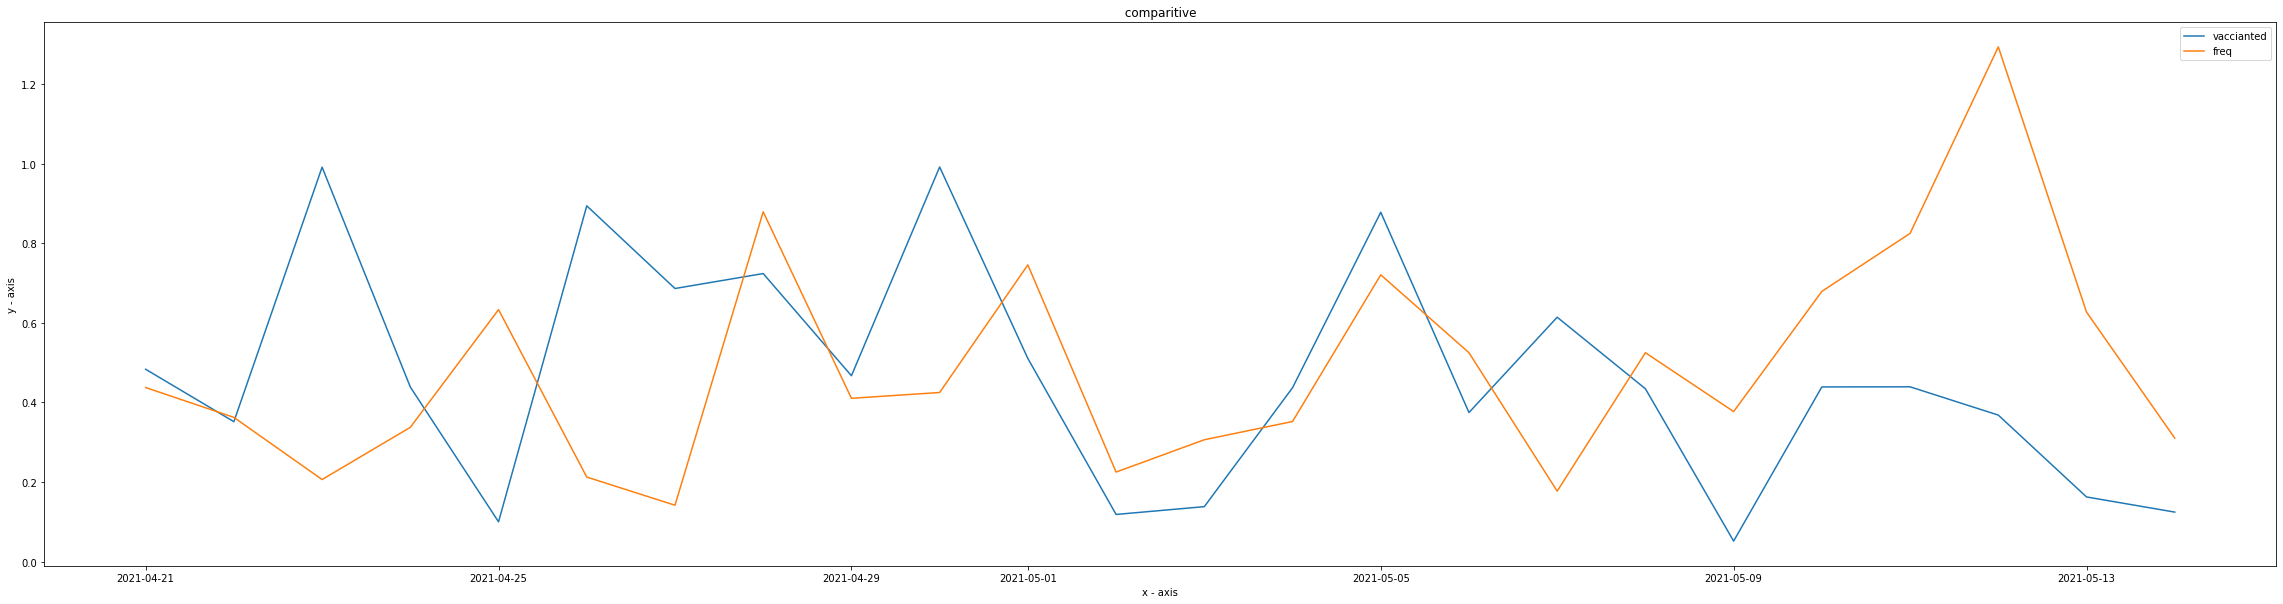

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
x1 = final['date'][:24]
y1 = final['vaccinated1'][:24]
# plotting the line 1 points 

plt.plot(x1, y1, label = "vaccianted")
# line 2 points
x2 = final['date'][:24]
y2 = final['freq1'][:24]
# plotting the line 2 points 
plt.plot(x2, y2, label = "freq")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title(' comparitive ')

# show a legend on the plot
plt.legend()

# Display a figure.
plt.show()

In [25]:
column_1 = final['freq1']
column_2 = final['vaccinated1']
correlation = column_1. corr(column_2) 
print(correlation)


-0.5364534299545435
